# Preprocesamiento de los datos

In [44]:
from dotenv import load_dotenv
import os

# Cargar automáticamente las variables del archivo .env
load_dotenv()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_RAW = os.getenv('DATA_RAW')
DATA_PREPROCESSED = os.getenv('DATA_PROCESSED')

In [45]:
df = pd.read_csv(os.path.join('..',DATA_RAW, "dataframe_merged.csv"), sep=";")

In [46]:
df

,Ajuste Fecha,Dia Semana,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,Estacion,EsFeriado
0,2022-01-01,Lunes,5.36,12.45,5.47,5.03,NaN,12.41,11.60,5.60,...,64.0,3.270,86.0,4.47,0.51,40.0,Clouds,sky is clear,Verano,True
1,2022-01-02,Jueves,22.92,NaN,26.50,NaN,NaN,32.50,5.08,5.12,...,80.0,2.570,60.0,NaN,0.51,0.5,Clear,sky is clear,Verano,False
2,2022-01-03,Jueves,34.39,NaN,35.99,NaN,NaN,32.64,20.10,20.37,...,67.0,2.060,150.0,0.89,3.30,0.0,Clear,sky is clear,Verano,False
3,2022-01-04,Domingo,10.66,NaN,12.38,NaN,NaN,21.97,NaN,10.21,...,69.0,4.955,198.5,2.68,1.90,0.0,Clear,sky is clear,Verano,False
4,2022-01-05,Martes,11.42,NaN,23.53,NaN,NaN,18.89,5.05,5.07,...,53.5,4.885,125.0,3.13,NaN,0.0,Clear,sky is clear,Verano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2024-12-27,Domingo,16.74,5.08,24.01,NaN,NaN,22.17,10.09,10.67,...,58.5,2.150,70.0,0.00,NaN,0.0,Clear,sky is clear,Verano,False
1092,2024-12-28,Lunes,5.42,5.75,23.50,NaN,NaN,16.92,9.72,NaN,...,49.0,2.240,80.0,0.00,NaN,0.0,Clear,sky is clear,Verano,False
1093,2024-12-29,Martes,38.55,9.38,24.96,NaN,NaN,22.92,NaN,NaN,...,52.5,4.470,100.0,0.00,NaN,0.0,Clear,sky is clear,Verano,False
1094,2024-12-30,Miércoles,48.28,5.37,16.71,NaN,NaN,23.98,34.76,10.16,...,59.5,4.920,75.0,0.00,NaN,0.0,Clear,sky is clear,Verano,False


In [47]:
df['Ajuste Fecha'] = pd.to_datetime(df['Ajuste Fecha'])
df['Dia Semana'] = df['Ajuste Fecha'].dt.day_name(locale = 'es_ES')

## Eliminar registros sin features

In [48]:
df = df[~df['dt_iso'].isna()]

In [49]:
# Eliminar dt_iso
df.drop(columns=['dt_iso'], inplace=True)

# Eliminar Total Cantidad Kilos\
#df.drop(columns=['Total Cantidad Kilos'], inplace=True)

In [50]:
df.drop('Unnamed: 81', axis=1, inplace=True)

In [51]:
df.drop('Total Cantidad', axis = 1, inplace=True)

## División del conjunto de datos

In [52]:
# Ordenar por fecha
df = df.sort_values(by='Ajuste Fecha')

In [53]:
sabores = [f'Sabor {i}' for i in range(1,80)]

X = df.drop(columns=sabores)
y = df[sabores]

In [54]:
# Reservamos los últimos 14 días para test
# En Train
X_train = X[:-14]
y_train = y[:-14]

# En test
X_test = X[-14:]
y_test = y[-14:]

## Preprocesado

In [55]:
# Varriables numericas
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Variables categóricas
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [56]:
# Eliminar columna fehca
X_train.drop(columns=['Ajuste Fecha'], inplace=True)

C:\Users\IA-41\AppData\Local\Temp\ipykernel_9000\1042754550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=['Ajuste Fecha'], inplace=True)


### Pipeline

In [57]:
import sys
import os

# Agregar la raíz del proyecto al path de Python
sys.path.append(os.path.abspath('..'))


In [58]:
categorical_features

['Dia Semana', 'weather_main', 'weather_description', 'Estacion']

In [59]:
from src.features.build_features import build_preprocessing_pipeline
from sklearn.pipeline import Pipeline

preprocessor = build_preprocessing_pipeline(X_train, categorical_features) # Definimos preprocesador
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

pipeline.fit(X_train, y_train)


C:\Users\IA-41\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_zero',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['rain_1h']),
                                                 ('num_mean',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['temp', 'dew_point',
                                                   'feels_like', 'temp_min',
                                                   'temp_max', 'pressure',
                                                   'humidity', 'wind_speed',
                                                   'wind_deg', 'wind_gust',
                                                   'clouds_all']),
                                                 ('cat_mode',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dia Semana', 'weather_main',
                                                   'weather_description',
                                                   'Estacion'])],
                                   verbose_feature_names_out=False))])

In [60]:
# Obtener nombres de columnas
column_names = preprocessor.get_feature_names_out()

In [61]:
column_names.shape

(42,)

In [62]:
# Guardar pipeline
#import joblib
#joblib.dump(pipeline, os.path.join('..','src\\features', 'pipeline.pkl'))

In [63]:
# Importar el pipeline guardado
import joblib
pipeline = joblib.load(os.path.join('..','src\\features', 'pipeline.pkl'))

# Tranformar X_train
X_train_transformado = pipeline.transform(X_train)

In [64]:
X_train_transformado.shape

(1082, 42)

In [65]:
pd.DataFrame(X_train_transformado, columns=column_names).columns

Index(['rain_1h', 'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
       'clouds_all', 'Dia Semana_Domingo', 'Dia Semana_Jueves',
       'Dia Semana_Lunes', 'Dia Semana_Martes', 'Dia Semana_Miércoles',
       'Dia Semana_Sábado', 'Dia Semana_Viernes', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Mist',
       'weather_main_Rain', 'weather_description_broken clouds',
       'weather_description_few clouds', 'weather_description_fog',
       'weather_description_heavy intensity rain',
       'weather_description_light intensity drizzle',
       'weather_description_light rain', 'weather_description_mist',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds',
       'weather_description_sky is clear',
       'weather_description_thunderstorm with light rain',
       'weather_descript

### Visualización de la distribución de las variables

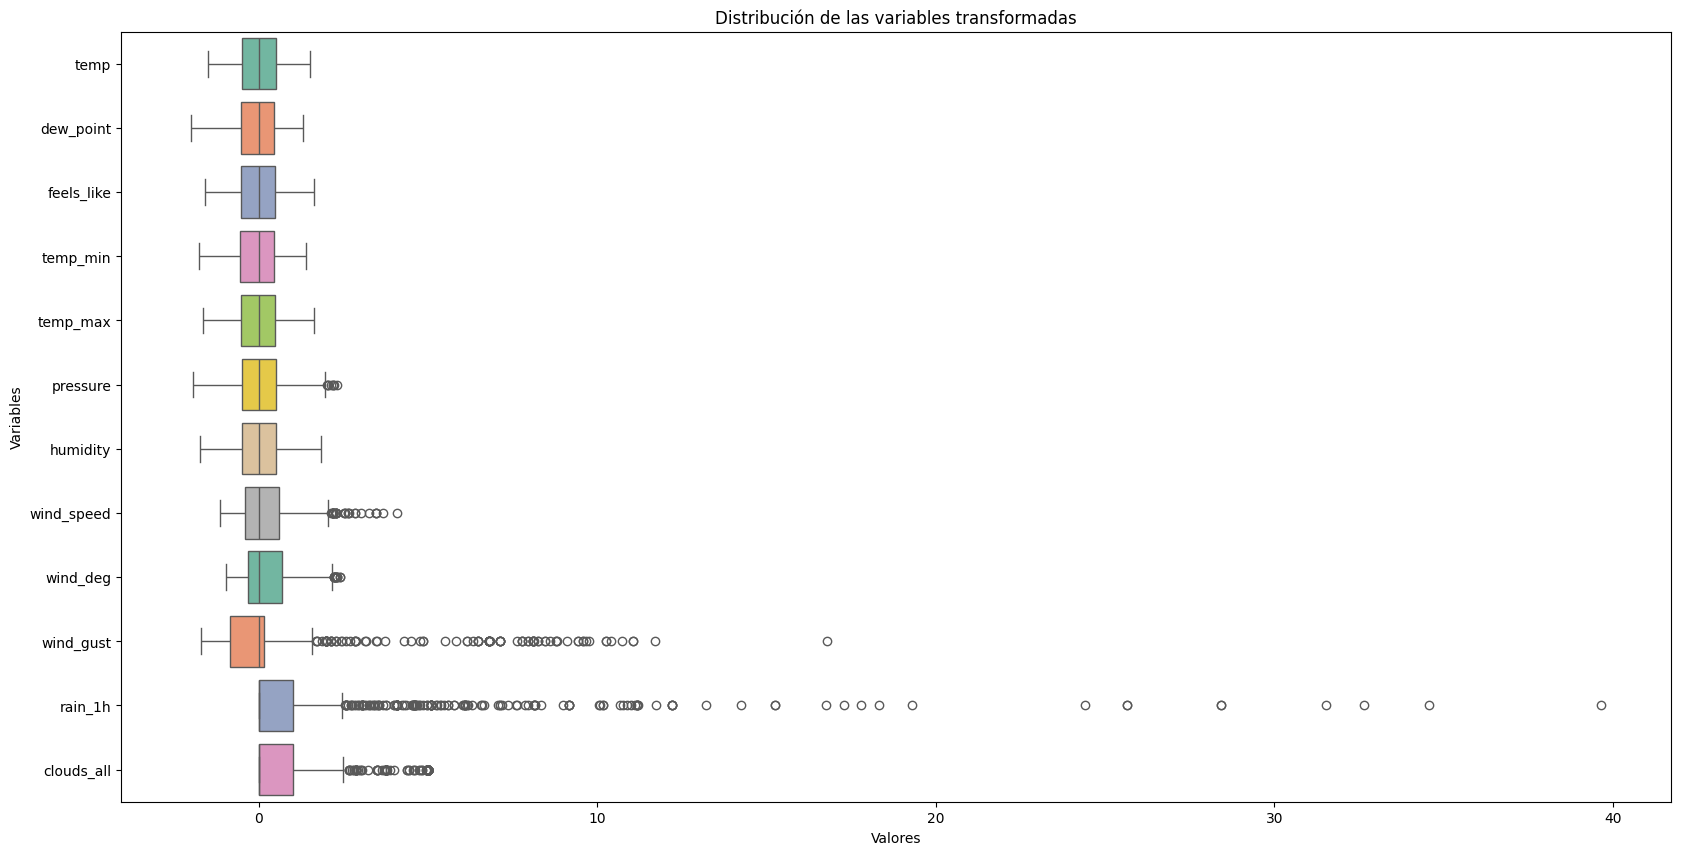

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos transformados
df_transformed = pd.DataFrame(X_train_transformado, columns=column_names)

# Generar el gráfico de boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_transformed[numerical_features], orient='h', palette='Set2')
plt.title('Distribución de las variables transformadas')
plt.xlabel('Valores')
plt.ylabel('Variables')
plt.show()

# Valores nulos variable objetivo

In [67]:
y_train.fillna(0, inplace = True)
y_train

C:\Users\IA-41\AppData\Local\Temp\ipykernel_9000\3416577688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace = True)


,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,Sabor 9,Sabor 10,...,Sabor 70,Sabor 71,Sabor 72,Sabor 73,Sabor 74,Sabor 75,Sabor 76,Sabor 77,Sabor 78,Sabor 79
0,5.36,12.45,5.47,5.03,0.0,12.41,11.60,5.60,6.22,11.21,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
1,22.92,0.00,26.50,0.00,0.0,32.50,5.08,5.12,0.00,25.26,...,0.00,1.07,0.00,37.09,43.60,0.00,20.0,50.0,28.03,11.63
2,34.39,0.00,35.99,0.00,0.0,32.64,20.10,20.37,0.00,49.79,...,0.00,3.17,3.29,30.47,37.01,0.00,20.0,50.0,25.95,10.61
3,10.66,0.00,12.38,0.00,0.0,21.97,0.00,10.21,0.00,22.96,...,0.00,0.00,1.02,11.89,11.54,0.00,10.0,10.0,11.30,5.59
4,11.42,0.00,23.53,0.00,0.0,18.89,5.05,5.07,0.00,26.02,...,0.00,1.04,3.06,18.13,25.47,0.00,60.0,70.0,12.66,11.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0.00,4.84,11.84,0.00,0.0,12.42,10.54,5.32,12.12,20.33,...,2.03,2.07,1.01,16.56,7.19,18.77,30.0,30.0,6.73,5.71
1078,23.08,5.06,34.18,0.00,0.0,17.66,5.24,0.00,7.08,26.19,...,0.00,6.23,4.11,37.18,30.72,5.88,30.0,40.0,24.72,9.92
1079,26.91,0.00,28.62,0.00,0.0,27.48,15.79,10.64,13.20,32.82,...,2.03,4.14,4.08,48.65,26.85,13.30,60.0,40.0,18.78,10.12
1080,4.65,9.79,23.68,0.00,0.0,18.78,26.27,10.66,6.60,36.94,...,3.04,4.13,1.03,22.72,31.95,24.86,30.0,30.0,18.86,11.05


# Guardar datos preprocesados

In [68]:
X_train_transformado = pd.DataFrame(X_train_transformado, columns=column_names)

In [69]:
df_train = pd.concat([X_train_transformado, y_train], axis = 1)

In [73]:
# Guardar el DataFrame de entrenamiento
df_train.to_csv(os.path.join('..', DATA_PREPROCESSED, "dataframe_train.csv"), sep = ";", index = False)

In [74]:
df_test = pd.concat([X_test, y_test], axis = 1)
#Guardar el Dataframe de Test
df_test.to_csv(os.path.join('..', DATA_PREPROCESSED, "dataframe_test.csv"), sep = ";", index = False)